In [62]:
import numpy as np
import scipy.io as sp
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import GridSearchCV

In [63]:
dataSet = sp.loadmat('breastw.mat') 
X = dataSet['X']
y = dataSet['y']
y_void = []

In [64]:
X.shape

(683, 9)

-1.1304347826086958
IsolationForest(contamination=0.1, max_features=9, max_samples=30,
                n_estimators=50, n_jobs=-1, random_state=5)


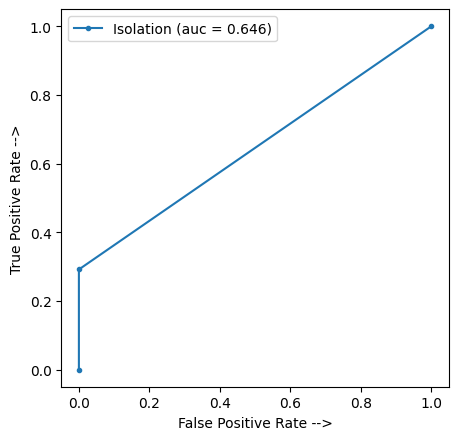

KeyboardInterrupt: 

In [65]:
skf = StratifiedKFold(n_splits=2)
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index,:], X[test_index,:]
    y_train, y_test = y[train_index], y[test_index]
    param_grid ={'n_estimators' : [10, 50],
             'max_samples' : ['auto', 30],
             'contamination' : np.arange(0.1, 0.5, 0.1),
             'max_features' : [9],
             'bootstrap' : [False, True],
             'n_jobs' : [-1],
             'random_state' : [5],
             'verbose' :[0],
             'warm_start' :[False, True]}
    grid = GridSearchCV(IsolationForest(), param_grid, scoring ="neg_mean_squared_error", cv = 5)
    grid.fit(X_train, y_train)
    # on affiche les caractéristiques du meilleur modèle
    print(grid.best_score_)

    # on sauve le modèle pour le tester sur de nouvelles données
    model = grid.best_estimator_
    print(model)
    y_pred = model.fit_predict(X_test)

    # on ajuste les prédictions au définition de nos classes (0 : bénin, 1 = malin)
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    from sklearn.metrics import roc_curve, auc
    fpr, tpr, threshold = roc_curve(y_test, y_pred)
    auc_isolation = auc(fpr, tpr)
    plt.figure(figsize=(5, 5), dpi=100)
    plt.plot(fpr, tpr, marker='.', label='Isolation (auc = %0.3f)' % auc_isolation)
    plt.xlabel('False Positive Rate -->')
    plt.ylabel('True Positive Rate -->')
    plt.legend()
    plt.show()

In [ ]:
X_train.shape

(342, 9)

In [ ]:
np.arange(0.1 ,0.5, 0.1)

array([0.1, 0.2, 0.3, 0.4])

In [ ]:
# from sklearn.model_selection import GridSearchCV
# param_grid ={'n_estimators' : [10, 50],
#              'max_samples' : [30, 342],
#              'contamination' : np.arange(0.1, 0.5, 0.1),
#              'max_features' : [9],
#              'bootstrap' : [False, True],
#              'n_jobs' : [-1],
#              'random_state' : [5],
#              'verbose' :[0],
#              'warm_start' :[False, True]}
# grid = GridSearchCV(IsolationForest(), param_grid, scoring ="neg_mean_squared_error", cv = 5)
# grid.fit(X_train)
# # on affiche les caractéristiques du meilleur modèle
# grid.best_score_

# # on sauve le modèle pour le tester sur de nouvelles données
# model = grid.best_estimator_
# y_pred = model.fit_predict(X_test)

C:\Users\leo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\leo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 759, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
C:\Users\leo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\leo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 759, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__

0.010355295152403611
IsolationForest(bootstrap=True, contamination=0.1, max_features=9,
                max_samples=100, n_estimators=10, n_jobs=-1, random_state=5)


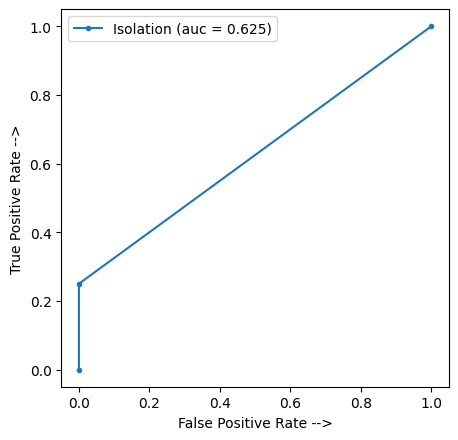

0.011494280602967014
IsolationForest(bootstrap=True, contamination=0.1, max_features=9,
                max_samples=50, n_estimators=10, n_jobs=-1, random_state=5)


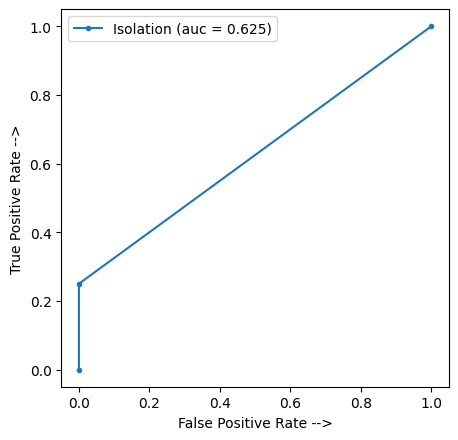

0.010296153358084505
IsolationForest(contamination=0.1, max_features=9, max_samples=100,
                n_estimators=10, n_jobs=-1, random_state=5)


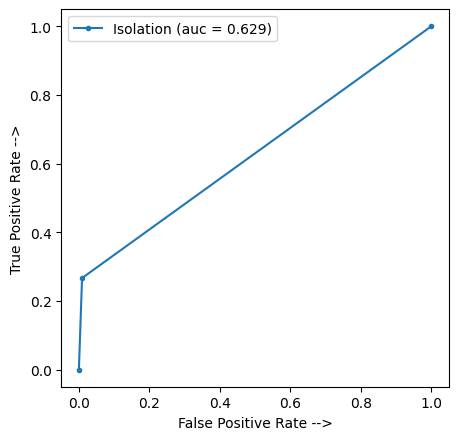

0.020946754734208324
IsolationForest(bootstrap=True, contamination=0.1, max_features=9,
                max_samples=100, n_estimators=10, n_jobs=-1, random_state=5)


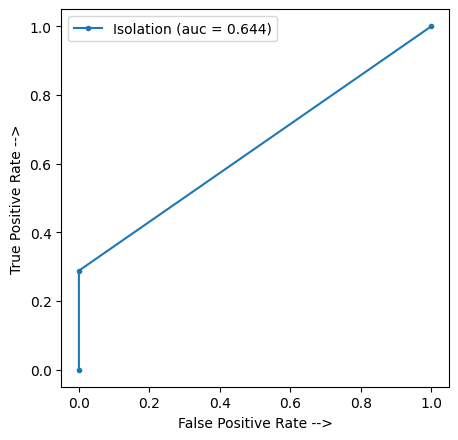

In [ ]:

from sklearn.metrics import roc_curve, auc
#"roc_auc"
from sklearn.metrics import roc_auc_score
skf = StratifiedKFold(n_splits=4)
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index,:], X[test_index,:]
    y_train, y_test = y[train_index], y[test_index]
    param_grid ={'n_estimators' : [10, 50],
             'max_samples' : [30, 50, 100],
             'contamination' : np.arange(0.1, 0.6, 0.1),
             'max_features' : [9],
             'bootstrap' : [False, True],
             'n_jobs' : [-1],
             'random_state' : [5],
             'verbose' :[0],
             'warm_start' :[False, True]}
    grid = GridSearchCV(IsolationForest(), param_grid, scoring ="roc_auc", cv = 5)
    grid.fit(X_train, y_train)
    # on affiche les caractéristiques du meilleur modèle
    print(grid.best_score_)

    # on sauve le modèle pour le tester sur de nouvelles données
    model = grid.best_estimator_
    print(model)
    y_pred = model.fit_predict(X_test)

    # on ajuste les prédictions au définition de nos classes (0 : bénin, 1 = malin)
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    fpr, tpr, threshold = roc_curve(y_test, y_pred)
    auc_isolation = auc(fpr, tpr)
    plt.figure(figsize=(5, 5), dpi=100)
    plt.plot(fpr, tpr, marker='.', label='Isolation (auc = %0.3f)' % auc_isolation)
    plt.xlabel('False Positive Rate -->')
    plt.ylabel('True Positive Rate -->')
    plt.legend()
    plt.show()

In [ ]:
# Variation de quelques paramètres d'isolation forest en fixant par défaut tous les autres
# d'abord contamination
# puis max_features
from sklearn.metrics import classification_report, precision_score, confusion_matrix, roc_curve, precision_recall_curve
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
import xlsxwriter
import numpy as np
from sklearn.metrics import precision_score, f1_score, accuracy_score, recall_score

In [ ]:
plage_contamination = np.arange (0.01, 0.51, 0.01)
plage_max_features = np.arange(1, 10, 1)

In [ ]:
print(plage_contamination)

[0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13 0.14
 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27 0.28
 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41 0.42
 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5 ]


In [ ]:
print(plage_max_features)

[1 2 3 4 5 6 7 8 9]


In [71]:
workbook1 = xlsxwriter.Workbook('results_data_conta.xlsx')
worksheet1 = workbook1.add_worksheet()
# Widen the first column to make the text clearer.
worksheet1.set_column('A:A', 20)

# Add a bold format to use to highlight cells.
label_donnee = workbook1.add_format({'bold': True},)

matrice=np.array([['contamination'],['F1 score'],['recall'],['precision'],['accuracy'],['AUC']])
skf = StratifiedKFold(n_splits=2)
# Start from the first cell. Rows and columns are zero indexed.
i=0
row=0
col=0

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index,:], X[test_index,:]
    y_train, y_test = y[train_index], y[test_index]

    for C in plage_contamination:
        model = IsolationForest(contamination = C)
        model.fit(X_train)
        y_pred=model.predict(X_test)
        y_pred[y_pred>0]=0           
        y_pred[y_pred<0]=1
        F1=round(f1_score(y_test,y_pred),3)
        recall=round(recall_score(y_test,y_pred),3)
        precision=round(precision_score(y_test,y_pred,zero_division=0),3)
        accuracy=round(accuracy_score(y_test,y_pred),3)
        fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred)
        roc_auc = metrics.auc(fpr, tpr)
        AUC2=roc_auc
        matrice = np.append(matrice,np.array([round(C,3),F1,recall,precision,accuracy,round(AUC2,3)]).reshape(6,1),axis=1)
        
        for row, data in enumerate(matrice):
            worksheet1.write_row(row+i*10, col, data)
    matrice=np.array([['contamination'],['F1 score'],['recall'],['precision'],['accuracy'],['AUC']])
    i=i+1

workbook1.close()                                    

In [70]:
workbook2 = xlsxwriter.Workbook('results_data_max_feat.xlsx')
worksheet2 = workbook2.add_worksheet()
# Widen the first column to make the text clearer.
worksheet2.set_column('A:A', 20)
# Add a bold format to use to highlight cells.
#label_donnee = workbook2.add_format({'bold': True, 'font_color': 'red'})


matrice=np.array([['max_features'],['F1 score'],['recall'],['precision'],['accuracy'],['AUC']])
skf = StratifiedKFold(n_splits=2)
i=0
row=0
col=0

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index,:], X[test_index,:]
    y_train, y_test = y[train_index], y[test_index]

    for Mf in plage_max_features:
        model = IsolationForest(max_features = Mf)
        model.fit(X_train)
        y_pred=model.predict(X_test)
        y_pred[y_pred>0]=0           
        y_pred[y_pred<0]=1
        F1=round(f1_score(y_test,y_pred),3)
        recall=round(recall_score(y_test,y_pred),3)
        precision=round(precision_score(y_test,y_pred,zero_division=0),3)
        accuracy=round(accuracy_score(y_test,y_pred),3)
        fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred)
        roc_auc = metrics.auc(fpr, tpr)
        AUC2=roc_auc
        # on spécifie le tableau auquel on veut ajouter des données, les données à ajouter puis l'axe d'ajout (0 = ajout par ligne et 1 = ajout par colonne)
        # reshape permet de formater la dimension du tableau.
        matrice = np.append(matrice,np.array([Mf,F1,recall,precision,accuracy,round(AUC2,3)]).reshape(6,1),axis=1)
        
        for row, data in enumerate(matrice):
            worksheet2.write_row(row+i*10, col, data)
    matrice=np.array([['max_features'],['F1 score'],['recall'],['precision'],['accuracy'],['AUC']])
    i=i+1
    
    

workbook2.close()  
                            